# Demo: Heating of A Steel Bar

This notebook provide a demo case on the application of the heat conduction solver.
<br>

## Geometry & Computational Grid
In this case, we will consider a bar made of steel of length L = 0.01 m.  We will use N=51 nodes for this bar. As you can see, the grid spacing, dx will be $L/(N-1)=0.0002$ m.

## Solution & Time Stepping
The bar is exposed to the heat flux for 10 seconds. So we will set 50 time steps with a time step size of 0.2 second.
Also, we need to set parameters for Newton's iteration. All the parameters can be found in below.

## Initial & Boundary Conditions
The initial temperature of the bar is assumed to be a constant of 298 K. At the front (x=0 m), a fixed heat flux (qdot) of 750000 W/m$^2$ is applied and at the end (x=L m), an adiabatic BC (qdot=0) is applied.
## Material Properties
|  Property  |   Value   |   Unit   |
|------|------|------|
|   Density  | 7850| kg/m$^3$     |
|  Conductivity | 60.5 | W/(mK)|
|  Specific Heat | 434 | J/(mK)

First, import parameter module in order to get a Pandas series containing all the parameters.

In [23]:
import parameter as para
paras = para.main()

We can print out the paras object to see all the parameters.

In [24]:
print(paras)

problem                    HeatConduction
SpatialDiscretize    CenteredDifferencing
TimeDiscretize              BackwardEular
ODEsolver                 NewtonIteration
linearSolver                 numpy linalg
CPU                                     1
material                            steel
material function                constant
density                              7850
conductivity                         60.5
heatCapacity                          434
length                               0.01
numberOfNode                           51
numberOfTimeStep                       50
deltaTime                             0.2
maxIteration                           20
convergence                         1e-10
relaxation                              1
IC value                              298
x=0 type                         heatFlux
x=0 value                          750000
x=L type                         heatFlux
x=L value                               0
Name: values, dtype: object


As you can see, there are a lot of parameters to solve a PDE. 
It is noted that you can alter any parameter you want.
<br>
Now we have the parameters, now let's import the heatConduction solver.

In [25]:
import heatConduction as hc

The heatConduction package contains necessary components to solve the PDEs. To just use it as a solver, simply passing the generated parameters to the solve function and execute. <br>
The solution process will be displayed as, time step, physical time, number of Newton's iteration and residual.
For details of the solution strategy, please review any numerical analysis text book.

In [26]:
results, cache = hc.solve(paras)

 Heat Conduction Solver
 [Step] [Pysical Time] [Iteration] [Residue]
 [   1 ]  [   0.20 ]  [  2 ]  [ 2.28E-11 ]
 [   2 ]  [   0.40 ]  [  2 ]  [ 2.69E-11 ]
 [   3 ]  [   0.60 ]  [  2 ]  [ 2.30E-11 ]
 [   4 ]  [   0.80 ]  [  2 ]  [ 2.29E-11 ]
 [   5 ]  [   1.00 ]  [  2 ]  [ 2.79E-11 ]
 [   6 ]  [   1.20 ]  [  2 ]  [ 3.21E-11 ]
 [   7 ]  [   1.40 ]  [  2 ]  [ 2.74E-11 ]
 [   8 ]  [   1.60 ]  [  2 ]  [ 2.59E-11 ]
 [   9 ]  [   1.80 ]  [  2 ]  [ 2.22E-11 ]
 [  10 ]  [   2.00 ]  [  2 ]  [ 2.63E-11 ]
 [  11 ]  [   2.20 ]  [  2 ]  [ 2.77E-11 ]
 [  12 ]  [   2.40 ]  [  2 ]  [ 2.97E-11 ]
 [  13 ]  [   2.60 ]  [  2 ]  [ 3.36E-11 ]
 [  14 ]  [   2.80 ]  [  2 ]  [ 2.52E-11 ]
 [  15 ]  [   3.00 ]  [  2 ]  [ 2.18E-11 ]
 [  16 ]  [   3.20 ]  [  2 ]  [ 2.76E-11 ]
 [  17 ]  [   3.40 ]  [  2 ]  [ 2.52E-11 ]
 [  18 ]  [   3.60 ]  [  2 ]  [ 2.69E-11 ]
 [  19 ]  [   3.80 ]  [  2 ]  [ 2.73E-11 ]
 [  20 ]  [   4.00 ]  [  2 ]  [ 2.24E-11 ]
 [  21 ]  [   4.20 ]  [  2 ]  [ 2.80E-11 ]
 [  22 ]  [   4.40 ]  [  2 ]

The solve output the results and a cache. The results is a numpy array consist of evolution of each time step over the domain. The cache file is a Python dictionary consists of some variables used by debugging. <br>
In order to view the results, import the postprocessing package and preprocess the results. <br>
The preprocess transform the numpy array into a Pandas DataFrame, with index as grid locations and columns as timings.

In [27]:
import postprocessing as pp
T = pp.preprocess(paras, results)

The first plot is the evolution field in both time and space. We can view the results in a 3D contour plot by just passing the processed T to the function evolutionField(). <br>
It can be seen that the temperature over the var is increasing as time elapses.

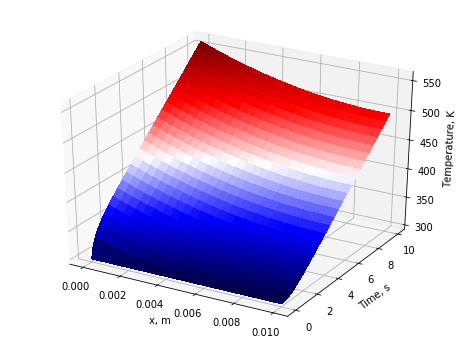

In [28]:
pp.evolutionField(T)

We can also check the temperature evolution for some specific locations, as there are thermal couples. <br>
Simply create a list of locations you want to check, and then pass the T and positions into the thermalCouplePlot() function.

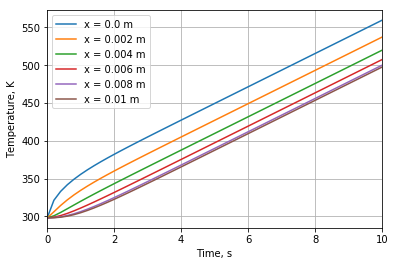

In [29]:
positions = [0, 0.002, 0.004, 0.006, 0.008, 0.01]
pp.thermalCouplePlot(T, positions)

We can futher check how the temperature is distributed over the domain at different times. Simply create a list of timings you want, and pass the T and times to the temperatureDistribution functions.

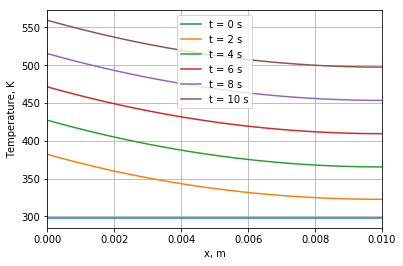

In [30]:
times = [0, 2, 4, 6, 8, 10]
pp.temperatureDistribution(T, times)

Thanks for viewing this notebook and enjoy!